## Calcul des performances et des matrices de confusion avec scikit-learn

* Complétez le notebook

In [6]:
import os
import pandas as pd

### Cas 1 : classification binaire : les ligands actifs ou inactifs sur CDC4
 * https://en.wikipedia.org/wiki/Cell_division_control_protein_4

#### Lecture des données
* Les données sont dans le fichier CDC4.csv fourni sur ecampus
* La partition Entraînement/Test est déjà faite sur ces données

In [4]:
def data_loading(target_directory, target_filename):
    target_address = os.path.join(target_directory,target_filename)
    data =  pd.read_csv(target_address, sep='\t')
    targets = data.iloc[:, 1]
    descriptions = data.iloc[:, 4:]
    training_descriptions = descriptions.loc[data['training/test set'] == 'training']
    test_descriptions =  descriptions.loc[data['training/test set'] == 'test']
    training_targets = targets.loc[data['training/test set'] == 'training']
    test_targets =  targets.loc[data['training/test set'] == 'test']
    return(training_descriptions, test_descriptions,training_targets, test_targets)

In [7]:
(training_descriptions, test_descriptions,training_targets, test_targets) =\
data_loading("./DonneesCDC4","CDC4.csv")

##### Appréhension des données
* Accéder à une donnée
* Données les dimensions des trames des échantillons d'apprentissage et de test

le jeu d'apprentissage : 1062 observations sur 196 descripteurs
le jeu de test : 271 observations sur 196 descripteurs


### Un arbre de décision avec Scikit Learn¶

In [9]:
import sklearn.tree as dt

* Documentation à https://scikit-learn.org/dev/modules/tree.html#tree

* Initialisez un arbre de décision avant apprentissage.

* Entrainez l'arbre avec les données d'apprentissage.

* Utilisez l'arbre précedent pour prédire la valeur d'activité du premier exemple du jeu de test.

#### Visualisation de l'arbre

In [18]:
list_of_the_attributes = list(training_descriptions.columns.values)
print("%s"%(list_of_the_attributes))

['MinAbsPartialCharge', 'NumRadicalElectrons', 'HeavyAtomMolWt', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MinPartialCharge', 'ExactMolWt', 'MolWt', 'NumValenceElectrons', 'MinEStateIndex', 'MinAbsEStateIndex', 'MaxPartialCharge', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'ES

* Si votre arbre s'appelle DT1, l'instruction suivante crée un fichier DOT représentant l'arbre.

In [19]:
dt.export_graphviz(DT1,out_file="cdc4_tree.dot",\
                   feature_names=list_of_the_attributes,\
                   class_names=["Active","Inactive"],
                  rounded=True, filled=True)

Ensuite, on peut convertir el fichier "dot" en fichier image au format souahité grace au programme dot du paquet graphviz :
`dot -Tpng cdc2_tree.dot -o cdc2_tree.png`

### La mesure des performances
* Aide des différentes mesures proposées :
https://scikit-learn.org/dev/modules/model_evaluation.html#classification-metrics

In [20]:
import sklearn.metrics as mt

#### Le taux de bonnes prédictions
* Indiquez le taux de bonnes prédictions à associer au classifieur construit.

Les performances sont 0.7749 


#### La matrice de confusion
* Indiquez la matrice de confusion associée.

[[ 51  37]
 [ 24 159]]


Pour représenter la matrice de confusion :
* une aide à : https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

* Pour choisir la couleur :
https://matplotlib.org/stable/gallery/color/colormap_reference.html

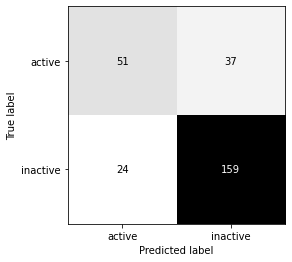

## glass : un cas de classification non binaire
* Ici un cas de classification non binaire (6 classes différentes).

In [28]:
DS_Glass = pd.read_csv("./DonneesGlass/glass.csv")

### Partitionner en échantillon de test / échantillon d'apprentissage
* Dans le cas de glass, la partition n'est pas donnée à l'avance.
* Grâce à la méthode split de model_selection, partitionnez le jeu de données en deux : un échantillon d'apprentissage rassemblant 75\% des exemples et un jeu de test rassemblant ... 25 \% des données.

In [27]:
import sklearn.model_selection as ms

* Pour réaliser une partition "simple" du jeu de données en jeu d'entrainement/jeu de test :
il y a train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
(glass_train,glass_test)= 

* Séparez la description de la cible.

In [31]:
glass_train_descriptions = 
glass_train_targets = 
glass_test_descriptions = 
glass_test_targets = 

#### Un arbre de décision à partir du jeu d'apprentissage
* de manière similaire à l'exemple précédent, faites un arbre de décision, faites un image

DecisionTreeClassifier()

7


#### Le taux de bonnes performances
* Indiquez le taux de bonnes performances de l'arbre

Les performances sont 0.9815 


#### La matrice de confusion

* Représentation de la matrice de confusion avec la fonction inspirée de : https://stackoverflow.com/questions/71574168/how-to-plot-confusion-matrix-without-color-coding

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
def plot_confusion_matrix(cm, classes, title,
                          normalize=False,
                          file='confusion_matrix',
                          cmap='gray_r',
                          linecolor='k'):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_title = 'Confusion matrix, with normalization'
    else:
        cm_title = title

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                yticklabels=classes, #xticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title(cm_title)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    plt.savefig(f'{file}.png')

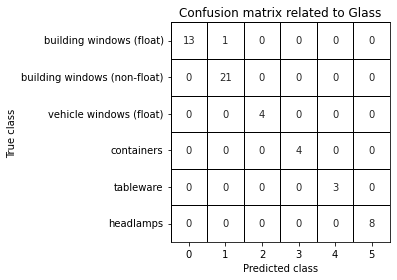